In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#GetHub url
# https://github.com/RenM23/DataAnalytics_Project1

In [3]:
#Problem Statement:
#Has air pollution in the United States shown a significant trend over the period of 2000 
#to 2013? 
#Sub-questions:  
#Which states have the highest average air pollution over the period of 2000-2013?
#Is there a clear upward or downward trend in air pollution levels within the states
# with the highest pollution?
#How does the trend of air pollution in the highest polluted states compare to the national
# average over the same period?

In [4]:
df = pd.read_csv('Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv')
print(df.head())

   MeasureId                                        MeasureName MeasureType  \
0         83  Number of days with maximum 8-hour average ozo...      Counts   
1         83  Number of days with maximum 8-hour average ozo...      Counts   
2         83  Number of days with maximum 8-hour average ozo...      Counts   
3         83  Number of days with maximum 8-hour average ozo...      Counts   
4         83  Number of days with maximum 8-hour average ozo...      Counts   

  StratificationLevel  StateFips StateName  CountyFips CountyName  ReportYear  \
0      State x County          1   Alabama        1027       Clay        1999   
1      State x County          1   Alabama        1051     Elmore        1999   
2      State x County          1   Alabama        1073  Jefferson        1999   
3      State x County          1   Alabama        1079   Lawrence        1999   
4      State x County          1   Alabama        1089    Madison        1999   

   Value      Unit  UnitName    DataOr

In [5]:
print(df.shape)

(218635, 14)


In [6]:
#View Column names
print(df.columns.tolist())

['MeasureId', 'MeasureName', 'MeasureType', 'StratificationLevel', 'StateFips', 'StateName', 'CountyFips', 'CountyName', 'ReportYear', 'Value', 'Unit', 'UnitName', 'DataOrigin', 'MonitorOnly']


In [7]:
#Columns for use
Columns = ['ReportYear', 'Unit', 'Value', 'StateName']
df_selected = df[Columns]
print(df_selected)

        ReportYear      Unit      Value StateName
0             1999  No Units  33.000000   Alabama
1             1999  No Units   5.000000   Alabama
2             1999  No Units  39.000000   Alabama
3             1999  No Units  28.000000   Alabama
4             1999  No Units  31.000000   Alabama
...            ...       ...        ...       ...
218630        2007     µg/m³   6.207126   Wyoming
218631        2008     µg/m³   6.369764   Wyoming
218632        2009     µg/m³   6.241708   Wyoming
218633        2010     µg/m³   6.125957   Wyoming
218634        2011     µg/m³   6.646464   Wyoming

[218635 rows x 4 columns]


In [8]:
#Find the most recent year this dataset has available
most_recent_year = df['ReportYear'].max()
print(most_recent_year)

2013


In [9]:
#Find the oldest year available
oldest_year = df['ReportYear'].min()
print(oldest_year)

1999


In [10]:
#Filter out Unit column to focus on only the mircograms per cubic meter measurement "µg/m³" unit
unit_filtered_df = df_selected[df_selected['Unit'] == 'µg/m³']
print(unit_filtered_df.head(5))

       ReportYear   Unit      Value      StateName
39218        2003  µg/m³  12.349080  West Virginia
39219        2002  µg/m³  10.953455        Florida
39220        1999  µg/m³  15.155819       Missouri
39221        2001  µg/m³   8.272648        Montana
39222        2006  µg/m³   9.553561        Florida


In [11]:
#Check for missing values
missing_values = unit_filtered_df.isnull().sum()
print ("Missing values: \n", missing_values)

Missing values: 
 ReportYear    0
Unit          0
Value         0
StateName     0
dtype: int64


In [12]:
#Check for duplicates
duplicates =unit_filtered_df.duplicated().sum()
print("Number of duplicated rows: ", duplicates)

Number of duplicated rows:  0


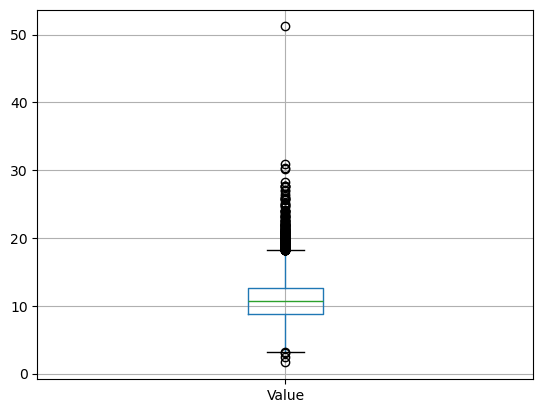

In [13]:
#Check for outliers
unit_filtered_df.boxplot(column = 'Value') 
plt.show()

In [14]:
#Fix the outlier in  Value column
df_nooutlier = unit_filtered_df[unit_filtered_df['Value']<35]
print(df_nooutlier)

        ReportYear   Unit      Value      StateName
39218         2003  µg/m³  12.349080  West Virginia
39219         2002  µg/m³  10.953455        Florida
39220         1999  µg/m³  15.155819       Missouri
39221         2001  µg/m³   8.272648        Montana
39222         2006  µg/m³   9.553561        Florida
...            ...    ...        ...            ...
218630        2007  µg/m³   6.207126        Wyoming
218631        2008  µg/m³   6.369764        Wyoming
218632        2009  µg/m³   6.241708        Wyoming
218633        2010  µg/m³   6.125957        Wyoming
218634        2011  µg/m³   6.646464        Wyoming

[42620 rows x 4 columns]


In [15]:
#Check if outliers were omitted
check_omited = df_nooutlier.sort_values(by = 'Value', ascending=False).head(5)
print(check_omited)

        ReportYear   Unit      Value   StateName
41634         2001  µg/m³  30.951858  California
186515        2001  µg/m³  30.344952  California
44060         1999  µg/m³  30.201011  California
40722         2000  µg/m³  28.300266  California
40001         1999  µg/m³  27.710583  California


In [16]:
#View the average Values with Units of 'µg/m³'
average_value = df_nooutlier['Value'].mean()
print(average_value)

10.756282698172381


In [17]:
#Get the average Value where Units = µg/m³ per state
average_per_state = df_nooutlier.groupby('StateName')['Value'].mean()
print(average_per_state)

StateName
Alabama                 12.660399
Alaska                   7.767187
Arizona                  8.289107
Arkansas                11.671381
California              11.681602
Colorado                 6.618121
Connecticut             11.157422
Delaware                12.715068
District of Columbia    13.679617
Florida                  9.452341
Georgia                 12.789647
Hawaii                   4.756838
Idaho                    8.295204
Illinois                12.692880
Indiana                 13.741218
Iowa                    10.564232
Kansas                   9.468404
Kentucky                12.831368
Louisiana               11.149758
Maine                    8.569217
Maryland                12.916043
Massachusetts           10.602896
Michigan                10.360120
Minnesota                9.434254
Mississippi             11.341857
Missouri                11.314903
Montana                  7.378197
Nebraska                 8.332123
Nevada                   7.429975
New 

In [18]:
#Print out the top 5 states with the highest average Value of all time
top_5_states = average_per_state.sort_values(ascending=False).head(5)
top_5_states = top_5_states.round(2)
print(top_5_states)

StateName
Ohio                    13.97
Indiana                 13.74
District of Columbia    13.68
Pennsylvania            13.04
Maryland                12.92
Name: Value, dtype: float64


In [19]:
#Find the average pollution value of top 5 states where Report year = 2000
states_of_interest = ['Ohio', 'Indiana', 'District of Columbia', 'Pennsylvania', 'Maryland']

df_filtered = df_nooutlier[(df_nooutlier['StateName'].isin(states_of_interest))&(df_nooutlier['ReportYear']==2000)]

average_pollution_2000 = df_filtered.groupby('StateName')['Value'].mean()
average_pollution_2000 = average_pollution_2000.round(2)

print(average_pollution_2000)

StateName
District of Columbia    16.66
Indiana                 15.93
Maryland                15.69
Ohio                    17.41
Pennsylvania            14.95
Name: Value, dtype: float64


In [20]:
#Find the average pollution value of top 5 states of all time where Report year = 2004
df_filtered = df_nooutlier[(df_nooutlier['StateName'].isin(states_of_interest))&(df_nooutlier['ReportYear']==2004)]

average_pollution_2004 = df_filtered.groupby('StateName')['Value'].mean()
average_pollution_2004 = average_pollution_2004.round(2)

print(average_pollution_2004)

StateName
District of Columbia    15.14
Indiana                 13.65
Maryland                14.13
Ohio                    14.26
Pennsylvania            13.88
Name: Value, dtype: float64


In [21]:
#Find the average pollution value of top 5 states of all time where Report year = 2009
df_filtered = df_nooutlier[(df_nooutlier['StateName'].isin(states_of_interest))&(df_nooutlier['ReportYear']==2009)]

average_pollution_2009 = df_filtered.groupby('StateName')['Value'].mean()
average_pollution_2009 = average_pollution_2009.round(2)

print(average_pollution_2009)

StateName
District of Columbia    10.70
Indiana                 11.94
Maryland                10.39
Ohio                    12.10
Pennsylvania            10.70
Name: Value, dtype: float64


In [22]:
#Find the average pollution value of top 5 states of all time where Report year = 2013
df_filtered = df_nooutlier[(df_nooutlier['StateName'].isin(states_of_interest))&(df_nooutlier['ReportYear']==2013)]

average_pollution_2013 = df_filtered.groupby('StateName')['Value'].mean()
average_pollution_2013 = average_pollution_2013.round(2)

print(average_pollution_2013)

StateName
District of Columbia     9.30
Indiana                 10.19
Maryland                 8.99
Ohio                    10.18
Pennsylvania            10.51
Name: Value, dtype: float64


In [23]:
#Seleted data into dataframe
data = {
    'ReportYear': [2000, 2000, 2000, 2000, 2000, 2004, 2004, 2004, 2004, 2004, 2009, 2009, 2009, 2009, 2009, 2013, 2013, 2013, 2013, 2013],
    'StateName': ['District of Columbia', 'Indiana', 'Ohio', 'Pennsylvania', 'Maryland', 'District of Columbia', 'Indiana', 'Ohio', 'Pennsylvania', 'Maryland', 'District of Columbia', 'Indiana', 'Ohio', 'Pennsylvania', 'Maryland', 'District of Columbia', 'Indiana', 'Ohio', 'Pennsylvania', 'Maryland'],
    'Value': [16.66, 15.93, 17.41, 14.95, 15.69, 15.14, 13.65, 14.26, 13.88, 14.13, 10.70, 11.94, 12.10, 10.70, 10.39, 9.30, 10.19, 10.18, 10.51, 8.99]
    }
print("report year:", len(data['ReportYear'])) 
print("state name:",len(data['StateName']))   
print("value:",len(data['Value']))       


report year: 20
state name: 20
value: 20


In [24]:
#Create data frame
df = pd.DataFrame(data)


In [25]:
#Create pivot table
df_pivot = df.pivot(index='ReportYear', columns='StateName', values='Value')
print(df_pivot)

StateName   District of Columbia  Indiana  Maryland   Ohio  Pennsylvania
ReportYear                                                              
2000                       16.66    15.93     15.69  17.41         14.95
2004                       15.14    13.65     14.13  14.26         13.88
2009                       10.70    11.94     10.39  12.10         10.70
2013                        9.30    10.19      8.99  10.18         10.51


In [26]:
#Create Grouped bar plot x axis = ReportYear
x_axis = np.arange(len(df_pivot.index))
width = 0.15

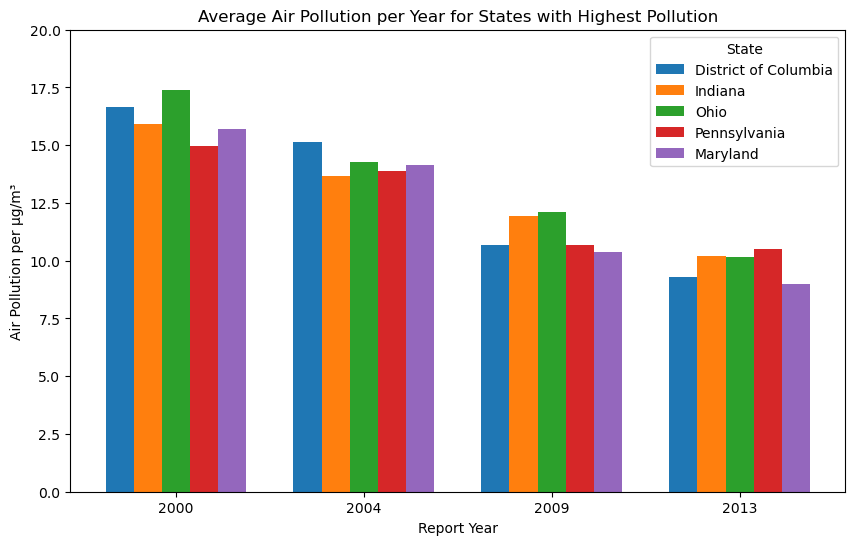

In [27]:
#Create grouped bar chart
plt.figure(figsize=(10, 6))

plt.bar(x_axis, df_pivot['District of Columbia'], width=width, label='District of Columbia')
plt.bar(x_axis + width, df_pivot['Indiana'], width=width, label='Indiana')
plt.bar(x_axis + 2*width, df_pivot['Ohio'], width=width, label='Ohio')
plt.bar(x_axis +3*width, df_pivot['Pennsylvania'], width=width, label='Pennsylvania')
plt.bar(x_axis +4*width, df_pivot['Maryland'], width=width, label='Maryland')

plt.xticks(x_axis + 2*width, df_pivot.index)
plt.xlabel('Report Year')
plt.ylabel('Air Pollution per µg/m³')
plt.title('Average Air Pollution per Year for States with Highest Pollution')

plt.legend(title='State')

plt.ylim(0, 20)
plt.show()

In [95]:
#Conclusion for sub-question 1:
#The grouped bar chart shows the average air pollution per cubic meter (µg/m) from the top five highest polluted states:
#The District of Columbia, Indiana, Ohio, Pennsylvania, and Maryland.
#This chart shows a steady decline in air pollution between the years 2000 to 2013.


In [29]:
#Sub-question 2:
#Is there a clear upward or downward trend in air pollution levels within the states
# with the highest pollution?

In [63]:
#State with the highest average air pollution from 2000-2013
print(top_5_states.head(1))

StateName
Ohio    13.97
Name: Value, dtype: float64


In [75]:
#Filter dataframe for Ohio
df_ohio = df_nooutlier[df_nooutlier['StateName']=='Ohio']

In [77]:
#Group by Report Year and calculate the average Value
avg_ohio_value = df_ohio.groupby('ReportYear')['Value'].mean()

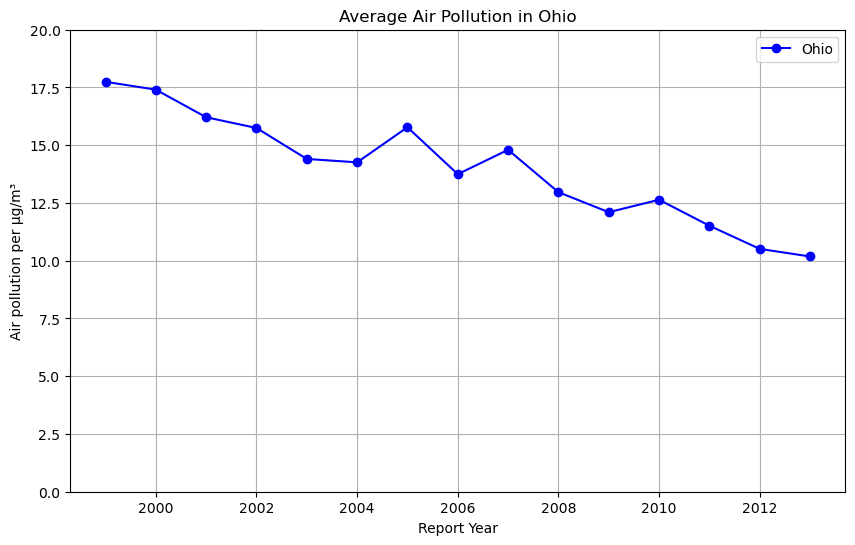

In [79]:
#Create line chart showing the air pollution trend over time of Ohio
plt.figure(figsize=(10,6))
plt.plot(avg_ohio_value.index, avg_ohio_value, marker ='o', linestyle='-', color ='b', label = 'Ohio')

plt.xlabel('Report Year')
plt.ylabel('Air pollution per µg/m³')
plt.title('Average Air Pollution in Ohio')
plt.legend()

plt.ylim(0,20)
plt.grid(True)
plt.show()


In [93]:
#Conclusion for Sub-question 2:
#This line chart shows the average air pollution of the highest polluted state, Ohio, from 2000 to 2013.
#The average air pollution per cubic meter (µg/m) shows a steady decline from the year 2000 to 2013, with levels starting 
#around 17.5 µg/m and declining to approximately 10 µg/m by 2013.

In [ ]:
#Sub-question # 3:
#How does the trend of air pollution in the highest polluted state compare to the national
# average over the same period?

In [81]:
#Ohio average air pollution per year
avg_ohio_pollution = df_nooutlier[df_nooutlier['StateName']=='Ohio'].groupby('ReportYear')['Value'].mean()

In [85]:
#National average air pollution per year
avg_national_pollution =  df_nooutlier.groupby('ReportYear')['Value'].mean()
print(avg_national_pollution.head(5))

ReportYear
1999    13.748994
2000    13.020075
2001    11.958253
2002    11.235081
2003    11.194532
Name: Value, dtype: float64


In [87]:
#Create two subplots to compare
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

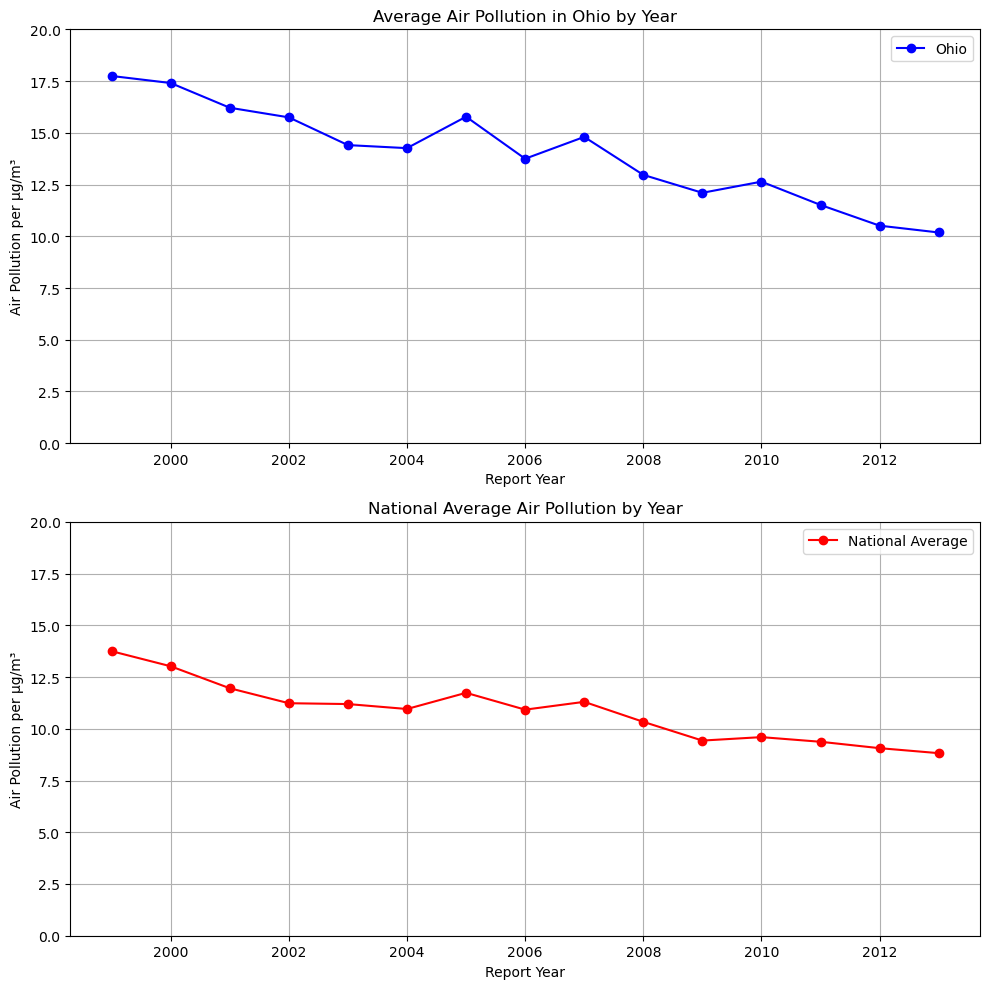

In [89]:
#First Chart, Ohio's Average Air Pollution
ax1.plot(avg_ohio_pollution.index, avg_ohio_pollution,  marker='o', linestyle='-', color='b', label='Ohio')
ax1.set_title('Average Air Pollution in Ohio by Year')
ax1.set_xlabel('Report Year')
ax1.set_ylabel('Air Pollution per µg/m³')
ax1.set_ylim(0, 20)
ax1.grid(True)
ax1.legend()

#Second Chart, National Average Air Pollution
ax2.plot(avg_national_pollution.index, avg_national_pollution, marker='o', linestyle='-', color='r', label='National Average' )
ax2.set_title('National Average Air Pollution by Year')
ax2.set_xlabel('Report Year')
ax2.set_ylabel('Air Pollution per µg/m³')
ax2.set_ylim(0, 20)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [97]:
#Conclusion sub-question 3:
#The two line charts show the average air pollution trends for Ohio, the highest polluted state, and the national average
#from the year 2000 to 2013.
#Ohio's air pollution levels were consistently higher than the national average, with average air pollution starting around 
#17 µg/m in the year 2000 vesus the national average of approximately 13 µg/m within the same year.
#Both Ohio and the national average show a significant and steady decline in air pollution, with levels around 10 µg/m for Ohio and approximately
# 8.5 µg/m for the national average.

In [31]:
#Summary:
#The graph displays the average air pollution levels (measured in micrograms per cubic meter)
#for five states that have the highest average air pollution over the years 2000-2013. 
#These states include: The District of Columbia, Indiana, Ohio, Pennsylvania, and Maryland.
#A clear downward trend in air pollution is evident across all sates over the 13-year period.
#In the year 2000, pollution levels were above 15 µg/m³ for most states, with Ohio having the
#highest level at over 17 µg/m³. By 2013 air pollution levels had significantly decreased for
#all states, with none exceeding 12 µg/m³.